## EXPLORATORY DATA ANALYSIS

### wrangling and visaulization

In [1]:
##importing libaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
##reading dataframes

df = pd.read_csv("zameen_karachi_cleaned_data.csv")     ##cleaned data
raw_df = pd.read_csv("zameen-karachi-dataset.csv")      ##not cleaned data

df.head(3)

,area,atm machines,barbeque area,bathrooms,baths,bedrooms,beds,broadband internet access,built in year,business center or media room in building,...,North Nazimabad,Others,Scheme 33,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion
0,55,0,0,1,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,150,0,0,0,4,4,4,0,2022,0,...,0,0,0,0,0,1,0,0,0,0
2,500,0,0,6,6,5,5,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23022 entries, 0 to 23021
Data columns (total 93 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   area                                         23022 non-null  int64
 1   atm machines                                 23022 non-null  int64
 2   barbeque area                                23022 non-null  int64
 3   bathrooms                                    23022 non-null  int64
 4   baths                                        23022 non-null  int64
 5   bedrooms                                     23022 non-null  int64
 6   beds                                         23022 non-null  int64
 7   broadband internet access                    23022 non-null  int64
 8   built in year                                23022 non-null  int64
 9   business center or media room in building    23022 non-null  int64
 10  cctv security         

In [4]:

##def F_Location(x):
##    if df["location"].value_counts()[x] < 1000:
##        df[df["location"] == x]["location"] = 'Others'  
    
##for x in df["location"]:
##    F_Location(x)
    

## handling outliers

<AxesSubplot:xlabel='area', ylabel='price'>

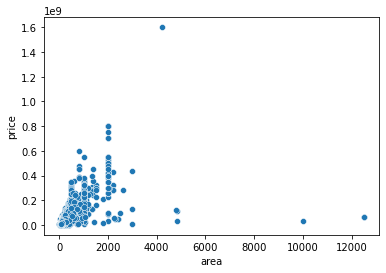

In [5]:
sns.scatterplot(df["area"],df["price"])

Text(0.5, 1.0, 'Subplot 2')

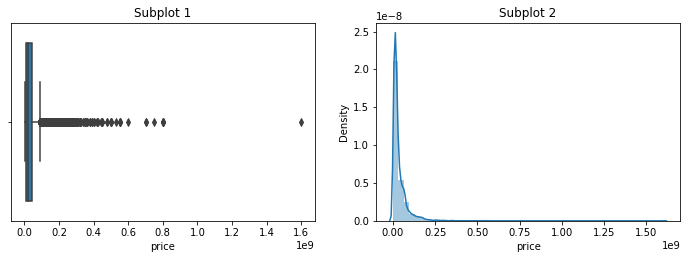

In [6]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)      
sns.boxplot(df['price'])
plt.title('Subplot 1')
plt.subplot(2,2,2)    
sns.distplot(df["price"])
plt.title('Subplot 2')

In [7]:
df = df[df["area"] < 500]  ##1500
df = df[df['price'] < 51000000]  ##51000000

Text(0.5, 1.0, 'after removing outliers')

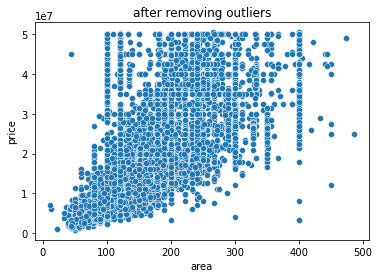

In [8]:
sns.scatterplot(df["area"],df["price"])

plt.title("after removing outliers")

Text(0.5, 1.0, 'Subplot 2')

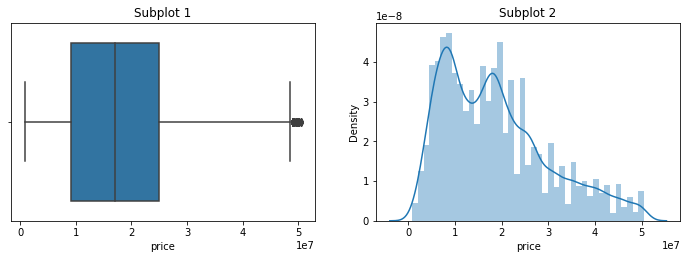

In [9]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)      
sns.boxplot(df['price'])
plt.title('Subplot 1')
plt.subplot(2,2,2)    
sns.distplot(df["price"])
plt.title('Subplot 2')


House            10691
Flat             10462
Upper Portion     1340
Lower Portion      403
Penthouse          114
Farm House          10
Room                 2
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

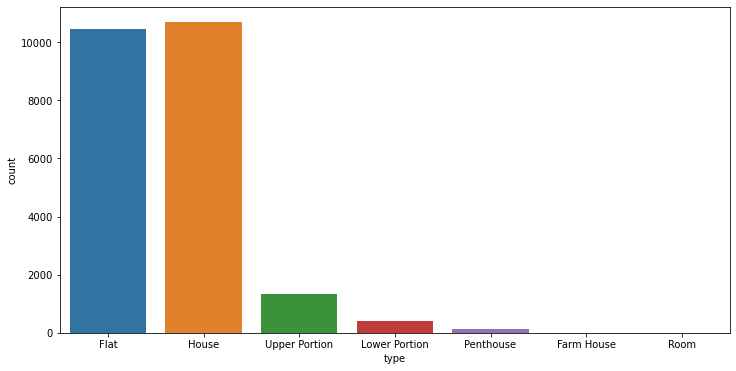

In [10]:
print( raw_df.type.value_counts()  )

plt.figure(figsize=(12, 6))
sns.countplot(raw_df["type"])

In [11]:
## making new column to analyze data more througly
df["price per sq yard"] =  df['price'] / df['area'] 
df["price per sq yard"].mean()

110125.24490489769

Text(0.5, 1.0, 'Subplot 2')

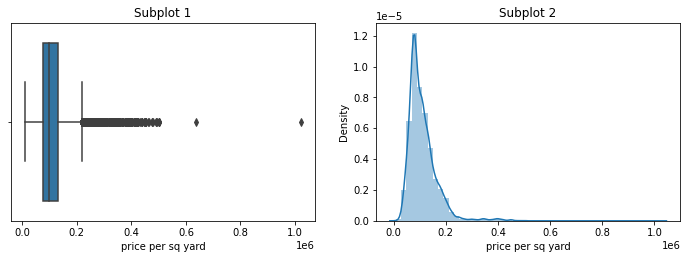

In [12]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)      
sns.boxplot(df['price per sq yard'])
plt.title('Subplot 1')
plt.subplot(2,2,2)    
sns.distplot(df["price per sq yard"])
plt.title('Subplot 2')


In [13]:

df = df[df['price per sq yard'] < 200000]  

df = df[df['price per sq yard'] > 40000]

df["price per sq yard"] = df["price per sq yard"].astype(float).astype(int)

Text(0.5, 1.0, 'Subplot 2')

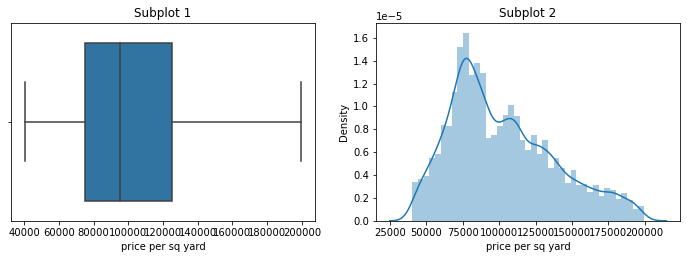

In [14]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)      
sns.boxplot(df['price per sq yard'])
plt.title('Subplot 1')
plt.subplot(2,2,2)    
sns.distplot(df["price per sq yard"])
plt.title('Subplot 2')


In [15]:
df.shape

(16624, 94)

In [16]:
df["built in year"].unique()

array([   0, 2022, 2021,    1, 2020, 2018, 2017, 2015, 2019, 2010, 2013,
       2000, 1985, 1996, 2016, 2023, 2024, 2012, 1995, 2008, 1990, 2014,
         90,    3,   15,    2, 2003, 2011,    5,    4, 2025, 1999,   20,
       2001, 2005, 2002, 1998, 2026,   10, 2006,  240,    6, 1994,    8,
         24, 2007, 2009,    9,   12,    7, 2004, 1992, 1986, 1980,   18,
       1997,   25, 1989, 1987,  202,  650,   50, 1200, 1984, 1970,   40,
       1975], dtype=int64)

In [17]:
df.drop(["built in year"],axis=1,inplace=True)

In [22]:
df.corr()

,area,atm machines,barbeque area,bathrooms,baths,bedrooms,beds,broadband internet access,business center or media room in building,cctv security,...,Others,Scheme 33,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion,price per sq yard
area,1.000000,-0.009062,0.048390,0.212776,0.522740,0.015457,0.488626,0.009471,-0.015775,NaN,...,-0.151920,-0.062425,NaN,-0.252797,0.218772,0.061541,0.070014,-0.007545,0.031056,0.147289
atm machines,-0.009062,1.000000,0.341725,0.020897,-0.059500,-0.000183,-0.084453,0.480841,0.665820,NaN,...,0.063893,-0.040040,NaN,0.220580,-0.178200,-0.036412,-0.017550,-0.001995,-0.070303,0.020690
barbeque area,0.048390,0.341725,1.000000,0.112301,0.014708,0.012789,0.006777,0.410447,0.309464,NaN,...,-0.039003,-0.054703,NaN,-0.072654,0.111661,-0.030944,-0.027424,-0.003118,-0.037912,0.064026
bathrooms,0.212776,0.020897,0.112301,1.000000,0.260779,0.086043,0.221740,0.102696,-0.005855,NaN,...,-0.071932,-0.024163,NaN,-0.114889,0.181363,-0.032844,-0.045742,-0.005968,-0.076944,0.130837
baths,0.522740,-0.059500,0.014708,0.260779,1.000000,0.024822,0.900673,0.023291,-0.060355,NaN,...,-0.058899,0.130908,NaN,-0.428794,0.474999,-0.010228,0.009581,-0.007100,-0.039044,0.469456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lower Portion,0.061541,-0.036412,-0.030944,-0.032844,-0.010228,-0.002950,-0.009308,-0.019118,-0.040061,NaN,...,0.010292,-0.018738,NaN,-0.174500,-0.109472,1.000000,-0.010531,-0.001197,-0.044439,-0.063445
Penthouse,0.070014,-0.017550,-0.027424,-0.045742,0.009581,-0.006597,0.004630,-0.026702,-0.019061,NaN,...,0.010986,-0.018666,NaN,-0.077104,-0.048371,-0.010531,1.000000,-0.000529,-0.019636,-0.023555
Room,-0.007545,-0.001995,-0.003118,-0.005968,-0.007100,-0.000859,-0.007079,-0.003801,-0.002167,NaN,...,-0.003404,-0.002122,NaN,-0.008767,-0.005500,-0.001197,-0.000529,1.000000,-0.002233,-0.003465
Upper Portion,0.031056,-0.070303,-0.037912,-0.076944,-0.039044,-0.011978,-0.031037,-0.019073,-0.076940,NaN,...,0.064293,-0.027206,NaN,-0.325352,-0.204108,-0.044439,-0.019636,-0.002233,1.000000,-0.133876


In [23]:
df.corr()["price"][70:80]    ##nearby  ##other

swimming pool           0.054378
waste disposal          0.126220
Bahria Town Karachi    -0.009962
Cantt                   0.257953
Clifton                 0.170770
DHA Defence            -0.040876
Federal B Area         -0.087408
Gadap Town             -0.036734
Gulistan-e-Jauhar       0.008005
Gulshan-e-Iqbal Town   -0.004810
Name: price, dtype: float64


fig, ax = plt.subplots(figsize=(24, 18))

hm = sns.heatmap(df.corr(), cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

plt.tight_layout()
plt.savefig("corr_matrix_incl_anno_double.png", dpi=300)

In [33]:
new_df = df[['area','baths','beds',"bathrooms",'dining room','distance from airport (kms)','drawing room',
             'electricity backup',"flooring","floors",'kids play area','kitchens','lounge or sitting room','study room','waste disposal','price per sq yard','price','Flat', 'House', 'Lower Portion',
       'Penthouse', 'Room', 'Upper Portion','Bahria Town Karachi', 'Cantt', 'Clifton', 'DHA Defence',
       'Federal B Area', 'Gadap Town', 'Gulistan-e-Jauhar',
       'Gulshan-e-Iqbal Town', 'Jamshed Town', 'Malir', 'North Nazimabad',
       'Others', 'Scheme 33']]

In [34]:
new_df.head(2)

,area,baths,beds,bathrooms,dining room,distance from airport (kms),drawing room,electricity backup,flooring,floors,...,DHA Defence,Federal B Area,Gadap Town,Gulistan-e-Jauhar,Gulshan-e-Iqbal Town,Jamshed Town,Malir,North Nazimabad,Others,Scheme 33
0,55,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,42,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X = new_df.drop(['price'],axis=1)

y = new_df['price']

## DATA TRANSFORMATION

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
new = pca.fit_transform(X)

In [37]:
X = pd.DataFrame(data = new
             , columns = ['pca1', 'pca2','pca3', 'pca4','pca5','pca6','pca7'])

In [38]:
X.head(2)

,pca1,pca2,pca3,pca4,pca5,pca6,pca7
0,-21097.683257,-108.390817,0.112222,-1.659160,-0.381974,-0.445515,0.285127
1,39405.309470,-140.764091,-0.313304,-2.522354,-0.068653,-0.716213,0.398633


## MODEL BUILDING AND EVALUATION

## linear regression

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
 
print( np.sqrt(   mean_squared_error(y_test,pred) )  )
r2_score( y_test,pred)

2353468.5697983247


0.9499160680811065

In [41]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
 
print( np.sqrt(   mean_squared_error(y_test,ridge_pred) )  )
r2_score( y_test,ridge_pred)

2353467.664949414


0.9499161065930994

### LASSO 

In [42]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
 
print( np.sqrt(   mean_squared_error(y_test,lasso_pred) )  )
r2_score( y_test,lasso_pred)

2353468.520063356


0.9499160701979164

### RIDGE

In [40]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
 
print( np.sqrt(   mean_squared_error(y_test,knn_pred) )  )
r2_score( y_test,knn_pred)

3171574.981620796


0.9090439529374892

### DECISION TREE REGRESSOR

In [47]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()
DTR.fit(X_train,y_train)
DTR_pred = DTR.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
 
print( np.sqrt(   mean_squared_error(y_test,DTR_pred) )  )
r2_score( y_test,DTR_pred)

349251.4283808103


0.9988970444941432

## DECISION TREE REGRESSOR PERFORMED BEST ON OUR DATA